## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  53.370774  1156.025681  0.303738   4.950854  1.320548
1  52.294866  1740.858512  0.596459   4.483936  1.565732
2  54.266889   902.994246  0.878407   4.942755  1.698079
3  29.361834   625.135193  0.923901  10.033861  1.669080
4  21.041621   156.691891  0.922568   8.420930  1.364483


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.93322 | train_mse: 6.06836 | train_mae: 1.79705 |  0:00:00s
epoch 1  | loss: 0.52004 | train_mse: 3.07455 | train_mae: 1.42094 |  0:00:00s


epoch 2  | loss: 0.4643  | train_mse: 2.16552 | train_mae: 1.14534 |  0:00:01s


epoch 3  | loss: 0.54992 | train_mse: 2.42274 | train_mae: 1.24128 |  0:00:01s


epoch 4  | loss: 0.56594 | train_mse: 1.72321 | train_mae: 1.04583 |  0:00:01s
epoch 5  | loss: 0.55972 | train_mse: 1.67312 | train_mae: 0.97798 |  0:00:02s


epoch 6  | loss: 0.43859 | train_mse: 1.608   | train_mae: 0.955   |  0:00:02s
epoch 7  | loss: 0.38928 | train_mse: 1.32176 | train_mae: 0.85883 |  0:00:02s


epoch 8  | loss: 0.45931 | train_mse: 1.18684 | train_mae: 0.8338  |  0:00:02s
epoch 9  | loss: 0.38816 | train_mse: 1.21488 | train_mae: 0.81916 |  0:00:02s


epoch 10 | loss: 0.39913 | train_mse: 0.9231  | train_mae: 0.73473 |  0:00:02s
epoch 11 | loss: 0.33072 | train_mse: 0.61786 | train_mae: 0.58538 |  0:00:02s


epoch 12 | loss: 0.3751  | train_mse: 0.45727 | train_mae: 0.49098 |  0:00:03s


epoch 13 | loss: 0.31105 | train_mse: 0.43685 | train_mae: 0.47053 |  0:00:03s
epoch 14 | loss: 0.38784 | train_mse: 0.40137 | train_mae: 0.45214 |  0:00:04s


epoch 15 | loss: 0.38246 | train_mse: 0.34453 | train_mae: 0.44623 |  0:00:04s


epoch 16 | loss: 0.29352 | train_mse: 0.34094 | train_mae: 0.4479  |  0:00:04s


epoch 17 | loss: 0.40501 | train_mse: 0.32378 | train_mae: 0.4108  |  0:00:05s
epoch 18 | loss: 0.28459 | train_mse: 0.31958 | train_mae: 0.39868 |  0:00:05s


epoch 19 | loss: 0.22351 | train_mse: 0.37495 | train_mae: 0.42626 |  0:00:05s
epoch 20 | loss: 0.2881  | train_mse: 0.24103 | train_mae: 0.35104 |  0:00:06s


epoch 21 | loss: 0.30964 | train_mse: 0.35991 | train_mae: 0.40279 |  0:00:06s
epoch 22 | loss: 0.35963 | train_mse: 0.28041 | train_mae: 0.38296 |  0:00:06s


epoch 23 | loss: 0.24446 | train_mse: 0.29088 | train_mae: 0.39574 |  0:00:06s
epoch 24 | loss: 0.437   | train_mse: 0.2209  | train_mae: 0.36477 |  0:00:06s


epoch 25 | loss: 0.24498 | train_mse: 0.20572 | train_mae: 0.35114 |  0:00:06s
epoch 26 | loss: 0.27022 | train_mse: 0.24949 | train_mae: 0.37969 |  0:00:06s


epoch 27 | loss: 0.29872 | train_mse: 0.2438  | train_mae: 0.36312 |  0:00:06s
epoch 28 | loss: 0.24327 | train_mse: 0.30484 | train_mae: 0.36319 |  0:00:07s


epoch 29 | loss: 0.28321 | train_mse: 0.31111 | train_mae: 0.37368 |  0:00:07s
epoch 30 | loss: 0.23943 | train_mse: 0.24554 | train_mae: 0.34952 |  0:00:07s


epoch 31 | loss: 0.20196 | train_mse: 0.27931 | train_mae: 0.37211 |  0:00:07s


epoch 32 | loss: 0.29278 | train_mse: 0.2418  | train_mae: 0.36975 |  0:00:08s
epoch 33 | loss: 0.36468 | train_mse: 0.26107 | train_mae: 0.37473 |  0:00:08s


epoch 34 | loss: 0.25968 | train_mse: 0.24503 | train_mae: 0.37352 |  0:00:08s
epoch 35 | loss: 0.4451  | train_mse: 0.22927 | train_mae: 0.3798  |  0:00:08s


epoch 36 | loss: 0.30735 | train_mse: 0.24865 | train_mae: 0.40293 |  0:00:08s
epoch 37 | loss: 0.28147 | train_mse: 0.23007 | train_mae: 0.38479 |  0:00:08s


epoch 38 | loss: 0.20907 | train_mse: 0.17669 | train_mae: 0.32513 |  0:00:09s
epoch 39 | loss: 0.19803 | train_mse: 0.1707  | train_mae: 0.30337 |  0:00:09s
epoch 40 | loss: 0.25503 | train_mse: 0.17001 | train_mae: 0.31916 |  0:00:09s


epoch 41 | loss: 0.16546 | train_mse: 0.1695  | train_mae: 0.31421 |  0:00:09s
epoch 42 | loss: 0.21822 | train_mse: 0.17033 | train_mae: 0.3089  |  0:00:09s


epoch 43 | loss: 0.19111 | train_mse: 0.15574 | train_mae: 0.29491 |  0:00:09s
epoch 44 | loss: 0.26458 | train_mse: 0.13613 | train_mae: 0.27547 |  0:00:09s


epoch 45 | loss: 0.19904 | train_mse: 0.13454 | train_mae: 0.26832 |  0:00:09s
epoch 46 | loss: 0.16683 | train_mse: 0.1586  | train_mae: 0.29557 |  0:00:09s
epoch 47 | loss: 0.15047 | train_mse: 0.19167 | train_mae: 0.31508 |  0:00:10s


epoch 48 | loss: 0.13237 | train_mse: 0.1844  | train_mae: 0.3109  |  0:00:10s
epoch 49 | loss: 0.16525 | train_mse: 0.1772  | train_mae: 0.31229 |  0:00:10s
epoch 50 | loss: 0.33333 | train_mse: 0.16585 | train_mae: 0.29893 |  0:00:10s


epoch 51 | loss: 0.25526 | train_mse: 0.1608  | train_mae: 0.30757 |  0:00:10s
epoch 52 | loss: 0.36111 | train_mse: 0.17463 | train_mae: 0.31986 |  0:00:10s
epoch 53 | loss: 0.1722  | train_mse: 0.16108 | train_mae: 0.30051 |  0:00:10s


epoch 54 | loss: 0.20504 | train_mse: 0.17559 | train_mae: 0.31834 |  0:00:10s
epoch 55 | loss: 0.33411 | train_mse: 0.18262 | train_mae: 0.32411 |  0:00:10s


epoch 56 | loss: 0.19065 | train_mse: 0.1791  | train_mae: 0.31201 |  0:00:10s
epoch 57 | loss: 0.19977 | train_mse: 0.18641 | train_mae: 0.31685 |  0:00:10s
epoch 58 | loss: 0.27228 | train_mse: 0.17979 | train_mae: 0.32634 |  0:00:11s


epoch 59 | loss: 0.2325  | train_mse: 0.14883 | train_mae: 0.31076 |  0:00:11s
epoch 60 | loss: 0.18109 | train_mse: 0.13707 | train_mae: 0.30166 |  0:00:11s
epoch 61 | loss: 0.21237 | train_mse: 0.14675 | train_mae: 0.30498 |  0:00:11s


epoch 62 | loss: 0.17136 | train_mse: 0.13431 | train_mae: 0.29091 |  0:00:11s
epoch 63 | loss: 0.32595 | train_mse: 0.16327 | train_mae: 0.30514 |  0:00:11s
epoch 64 | loss: 0.16133 | train_mse: 0.20908 | train_mae: 0.32814 |  0:00:11s


epoch 65 | loss: 0.21083 | train_mse: 0.17216 | train_mae: 0.30574 |  0:00:11s
epoch 66 | loss: 0.23663 | train_mse: 0.12087 | train_mae: 0.28104 |  0:00:11s


epoch 67 | loss: 0.20075 | train_mse: 0.12046 | train_mae: 0.27687 |  0:00:11s


epoch 68 | loss: 0.31119 | train_mse: 0.13977 | train_mae: 0.29933 |  0:00:12s


epoch 69 | loss: 0.37705 | train_mse: 0.17264 | train_mae: 0.32431 |  0:00:13s
epoch 70 | loss: 0.23644 | train_mse: 0.15967 | train_mae: 0.30451 |  0:00:13s


epoch 71 | loss: 0.19001 | train_mse: 0.15196 | train_mae: 0.28352 |  0:00:13s
epoch 72 | loss: 0.1392  | train_mse: 0.16165 | train_mae: 0.28215 |  0:00:13s


epoch 73 | loss: 0.17178 | train_mse: 0.15666 | train_mae: 0.28622 |  0:00:13s


epoch 74 | loss: 0.22349 | train_mse: 0.12408 | train_mae: 0.25482 |  0:00:13s
epoch 75 | loss: 0.20154 | train_mse: 0.12349 | train_mae: 0.25993 |  0:00:13s


epoch 76 | loss: 0.1914  | train_mse: 0.11904 | train_mae: 0.26083 |  0:00:14s
epoch 77 | loss: 0.11072 | train_mse: 0.13048 | train_mae: 0.27021 |  0:00:14s


epoch 78 | loss: 0.15872 | train_mse: 0.11866 | train_mae: 0.25959 |  0:00:14s
epoch 79 | loss: 0.14662 | train_mse: 0.1121  | train_mae: 0.2586  |  0:00:14s
epoch 80 | loss: 0.1854  | train_mse: 0.11436 | train_mae: 0.26247 |  0:00:14s


epoch 81 | loss: 0.1135  | train_mse: 0.11969 | train_mae: 0.26413 |  0:00:14s
epoch 82 | loss: 0.13381 | train_mse: 0.13314 | train_mae: 0.27567 |  0:00:14s


epoch 83 | loss: 0.12882 | train_mse: 0.12058 | train_mae: 0.26611 |  0:00:14s


epoch 84 | loss: 0.26312 | train_mse: 0.09844 | train_mae: 0.24097 |  0:00:15s
epoch 85 | loss: 0.18867 | train_mse: 0.08767 | train_mae: 0.22939 |  0:00:15s


epoch 86 | loss: 0.24218 | train_mse: 0.09208 | train_mae: 0.23791 |  0:00:15s
epoch 87 | loss: 0.22395 | train_mse: 0.11066 | train_mae: 0.2526  |  0:00:15s
epoch 88 | loss: 0.15498 | train_mse: 0.13609 | train_mae: 0.27891 |  0:00:15s


epoch 89 | loss: 0.1822  | train_mse: 0.12887 | train_mae: 0.27256 |  0:00:15s
epoch 90 | loss: 0.17672 | train_mse: 0.10939 | train_mae: 0.25344 |  0:00:15s


epoch 91 | loss: 0.1649  | train_mse: 0.1     | train_mae: 0.24207 |  0:00:15s
epoch 92 | loss: 0.20716 | train_mse: 0.09207 | train_mae: 0.23682 |  0:00:15s
epoch 93 | loss: 0.21924 | train_mse: 0.11667 | train_mae: 0.25662 |  0:00:15s


epoch 94 | loss: 0.20926 | train_mse: 0.11626 | train_mae: 0.26154 |  0:00:16s
epoch 95 | loss: 0.16067 | train_mse: 0.11293 | train_mae: 0.26936 |  0:00:16s
epoch 96 | loss: 0.15562 | train_mse: 0.11378 | train_mae: 0.27001 |  0:00:16s


epoch 97 | loss: 0.13358 | train_mse: 0.13514 | train_mae: 0.28803 |  0:00:16s
epoch 98 | loss: 0.1423  | train_mse: 0.12444 | train_mae: 0.27553 |  0:00:16s
epoch 99 | loss: 0.14052 | train_mse: 0.12226 | train_mae: 0.27286 |  0:00:16s


epoch 100| loss: 0.15349 | train_mse: 0.10792 | train_mae: 0.2672  |  0:00:16s
epoch 101| loss: 0.13187 | train_mse: 0.09161 | train_mae: 0.24716 |  0:00:16s


epoch 102| loss: 0.11834 | train_mse: 0.08336 | train_mae: 0.22796 |  0:00:16s
epoch 103| loss: 0.11831 | train_mse: 0.086   | train_mae: 0.22724 |  0:00:16s
epoch 104| loss: 0.13771 | train_mse: 0.08912 | train_mae: 0.23039 |  0:00:17s


epoch 105| loss: 0.21409 | train_mse: 0.10797 | train_mae: 0.25238 |  0:00:17s
epoch 106| loss: 0.21346 | train_mse: 0.11784 | train_mae: 0.2693  |  0:00:17s
epoch 107| loss: 0.12745 | train_mse: 0.09916 | train_mae: 0.24452 |  0:00:17s


epoch 108| loss: 0.24865 | train_mse: 0.13274 | train_mae: 0.27883 |  0:00:17s
epoch 109| loss: 0.17365 | train_mse: 0.12847 | train_mae: 0.27442 |  0:00:17s
epoch 110| loss: 0.15964 | train_mse: 0.11222 | train_mae: 0.2677  |  0:00:17s


epoch 111| loss: 0.12001 | train_mse: 0.12328 | train_mae: 0.27676 |  0:00:17s
epoch 112| loss: 0.23271 | train_mse: 0.12053 | train_mae: 0.26073 |  0:00:17s


epoch 113| loss: 0.12943 | train_mse: 0.12164 | train_mae: 0.25825 |  0:00:17s
epoch 114| loss: 0.18512 | train_mse: 0.09016 | train_mae: 0.2358  |  0:00:18s
epoch 115| loss: 0.09687 | train_mse: 0.0834  | train_mae: 0.22342 |  0:00:18s


epoch 116| loss: 0.14289 | train_mse: 0.09615 | train_mae: 0.2483  |  0:00:18s
epoch 117| loss: 0.12442 | train_mse: 0.09104 | train_mae: 0.24529 |  0:00:18s
epoch 118| loss: 0.33426 | train_mse: 0.09052 | train_mae: 0.24907 |  0:00:18s


epoch 119| loss: 0.1143  | train_mse: 0.08428 | train_mae: 0.23436 |  0:00:18s
epoch 120| loss: 0.19283 | train_mse: 0.08272 | train_mae: 0.23032 |  0:00:18s
epoch 121| loss: 0.22212 | train_mse: 0.08494 | train_mae: 0.23194 |  0:00:18s


epoch 122| loss: 0.10785 | train_mse: 0.09008 | train_mae: 0.23518 |  0:00:18s
epoch 123| loss: 0.09562 | train_mse: 0.11    | train_mae: 0.2637  |  0:00:18s
epoch 124| loss: 0.25546 | train_mse: 0.11883 | train_mae: 0.27329 |  0:00:18s


epoch 125| loss: 0.17992 | train_mse: 0.12322 | train_mae: 0.27141 |  0:00:19s
epoch 126| loss: 0.12598 | train_mse: 0.11659 | train_mae: 0.25644 |  0:00:19s
epoch 127| loss: 0.14965 | train_mse: 0.10995 | train_mae: 0.25812 |  0:00:19s


epoch 128| loss: 0.16743 | train_mse: 0.08808 | train_mae: 0.23707 |  0:00:19s
epoch 129| loss: 0.12143 | train_mse: 0.08707 | train_mae: 0.2353  |  0:00:19s
epoch 130| loss: 0.14713 | train_mse: 0.08204 | train_mae: 0.2269  |  0:00:19s


epoch 131| loss: 0.12356 | train_mse: 0.095   | train_mae: 0.25016 |  0:00:19s
epoch 132| loss: 0.19894 | train_mse: 0.11141 | train_mae: 0.26056 |  0:00:19s


epoch 133| loss: 0.15823 | train_mse: 0.08211 | train_mae: 0.23064 |  0:00:19s
epoch 134| loss: 0.09889 | train_mse: 0.07962 | train_mae: 0.22616 |  0:00:19s
epoch 135| loss: 0.12146 | train_mse: 0.08284 | train_mae: 0.23846 |  0:00:19s


epoch 136| loss: 0.23534 | train_mse: 0.08404 | train_mae: 0.24075 |  0:00:20s
epoch 137| loss: 0.10058 | train_mse: 0.08238 | train_mae: 0.23406 |  0:00:20s
epoch 138| loss: 0.13152 | train_mse: 0.08111 | train_mae: 0.23333 |  0:00:20s


epoch 139| loss: 0.32132 | train_mse: 0.08562 | train_mae: 0.23357 |  0:00:20s
epoch 140| loss: 0.15464 | train_mse: 0.10891 | train_mae: 0.24998 |  0:00:20s
epoch 141| loss: 0.1586  | train_mse: 0.11216 | train_mae: 0.24477 |  0:00:20s


epoch 142| loss: 0.23206 | train_mse: 0.16249 | train_mae: 0.29854 |  0:00:20s
epoch 143| loss: 0.13097 | train_mse: 0.20303 | train_mae: 0.31517 |  0:00:20s


epoch 144| loss: 0.21244 | train_mse: 0.1622  | train_mae: 0.27358 |  0:00:20s
epoch 145| loss: 0.13606 | train_mse: 0.14286 | train_mae: 0.26781 |  0:00:20s
epoch 146| loss: 0.20995 | train_mse: 0.14609 | train_mae: 0.26684 |  0:00:20s


epoch 147| loss: 0.23702 | train_mse: 0.17775 | train_mae: 0.28837 |  0:00:21s
epoch 148| loss: 0.21745 | train_mse: 0.18643 | train_mae: 0.29306 |  0:00:21s
epoch 149| loss: 0.15616 | train_mse: 0.17869 | train_mae: 0.28763 |  0:00:21s


epoch 150| loss: 0.12799 | train_mse: 0.14608 | train_mae: 0.26854 |  0:00:21s
epoch 151| loss: 0.12716 | train_mse: 0.11046 | train_mae: 0.25583 |  0:00:21s
epoch 152| loss: 0.47193 | train_mse: 0.20981 | train_mae: 0.31262 |  0:00:21s


epoch 153| loss: 0.2686  | train_mse: 0.20772 | train_mae: 0.31248 |  0:00:21s
epoch 154| loss: 0.18915 | train_mse: 0.14548 | train_mae: 0.28876 |  0:00:21s
epoch 155| loss: 0.15275 | train_mse: 0.1234  | train_mae: 0.26038 |  0:00:21s


epoch 156| loss: 0.16998 | train_mse: 0.15505 | train_mae: 0.27192 |  0:00:21s
epoch 157| loss: 0.23294 | train_mse: 0.19868 | train_mae: 0.30294 |  0:00:21s
epoch 158| loss: 0.14219 | train_mse: 0.17281 | train_mae: 0.27782 |  0:00:22s


epoch 159| loss: 0.15072 | train_mse: 0.14834 | train_mae: 0.25546 |  0:00:22s
epoch 160| loss: 0.17581 | train_mse: 0.14051 | train_mae: 0.25229 |  0:00:22s
epoch 161| loss: 0.24047 | train_mse: 0.13218 | train_mae: 0.25008 |  0:00:22s


epoch 162| loss: 0.17296 | train_mse: 0.1254  | train_mae: 0.24817 |  0:00:22s
epoch 163| loss: 0.20324 | train_mse: 0.12177 | train_mae: 0.24951 |  0:00:22s
epoch 164| loss: 0.20843 | train_mse: 0.10757 | train_mae: 0.24326 |  0:00:22s


epoch 165| loss: 0.20339 | train_mse: 0.09805 | train_mae: 0.23617 |  0:00:22s

Early stopping occurred at epoch 165 with best_epoch = 115 and best_train_mae = 0.22342
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

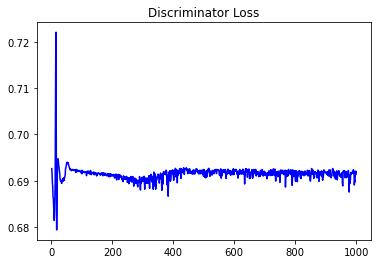

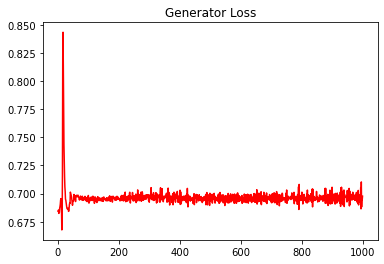

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.22711068141170573


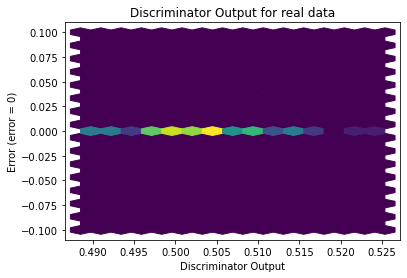

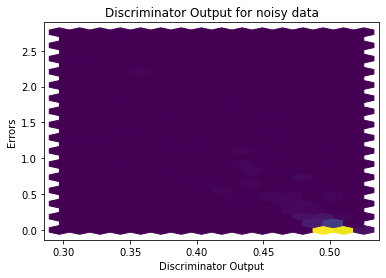

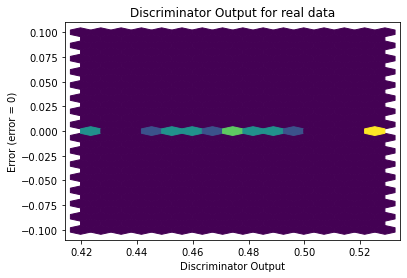

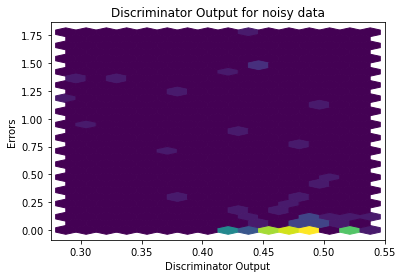

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


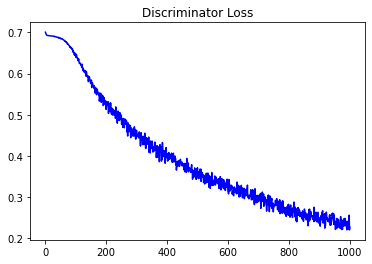

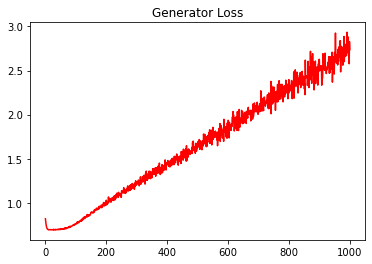

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1593875787515287


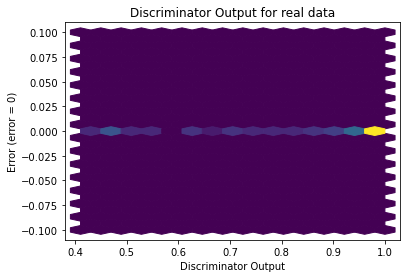

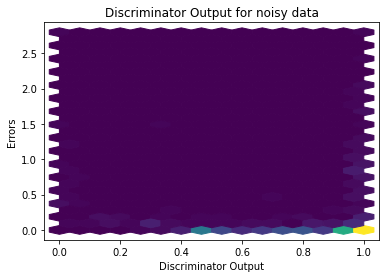

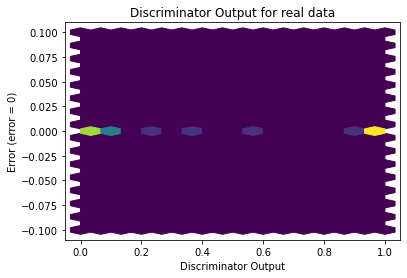

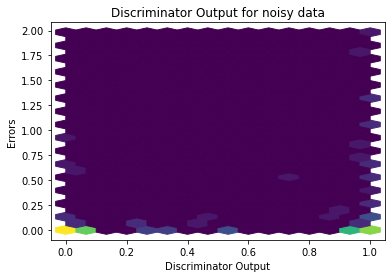

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
